# Insurance Project

## ✅ Verisetimizi tanıyalım :

In [122]:
# Gerekli kütüphaneler :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
# Veri setini çalışmamıza ekleyelim ve üzerinde çalışacağımız bir kopyasını oluşturalım.
data = pd.read_csv("insurance.csv")
dt = data.copy()
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
# Verisetimizin sütun ve satır bilgisini alalım :
dt.shape

(1338, 7)

In [41]:
# Verisetimizin özellikleri hakkında genel bilgi edinelim :
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
# Verisetimizin özellik başlıklarını sıralayalım :
dt.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
# Verisetimizdeki kategorik özellikler hakkında bilgi alalım :
dt['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
dt['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
dt['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [62]:
# Object özellikleri category tipine çevirelim :
object_columns = dt.select_dtypes("object").columns
for colname in object_columns:
 dt[colname] = dt[colname].astype('category')

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


## ✅ İstatistiksel Analiz :

In [47]:
dt

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['region'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dt, *[[['age', 'bmi'], ['bmi', 'children'], ['children', 'charges']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dt, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dt, *['smoker', 'region'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['age', 'sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['age', 'smoker'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['age', 'region'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['bmi', 'sex'], **{'inner': 'box'})
chart

In [48]:
# Kategorik özelliklerimizi inceleyelim :
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
print(dt["sex"].describe().T);

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object


In [14]:
print(dt["smoker"].describe().T);

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object


In [15]:
print(dt["region"].describe().T);

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object


In [40]:
# Eksik değerlerimiz var mı bakalım:
print(dt.isnull().sum().sort_values(ascending=False))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## ✅ Encoder İşlemleri :

In [67]:
# Verisetimizi kopyalayalım
dte = dt.copy()
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
# Sex özelliğimize LabelEncoder uygulayalım
dte["sex"] = LabelEncoder().fit_transform(dte["sex"])
# Smoker özelliğimize LabelEncoder uygulayalım
dte["smoker"] = LabelEncoder().fit_transform(dte["smoker"])
# Smoker özelliğimize LabelEncoder uygulayalım
dte["region"] = LabelEncoder().fit_transform(dte["region"])
dte.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


## ✅ Dağılımlar ve Karşılaştırmalı Analizler :

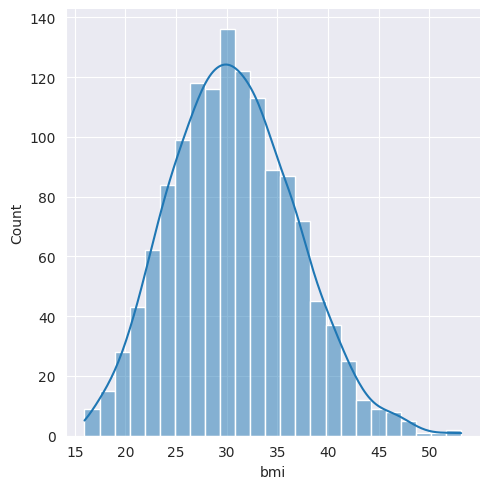

In [59]:
# Vücut Kitle Indeksinin dağılımı (Bmi - Body Mass Index)
sns.displot(dt.bmi, kde = True);

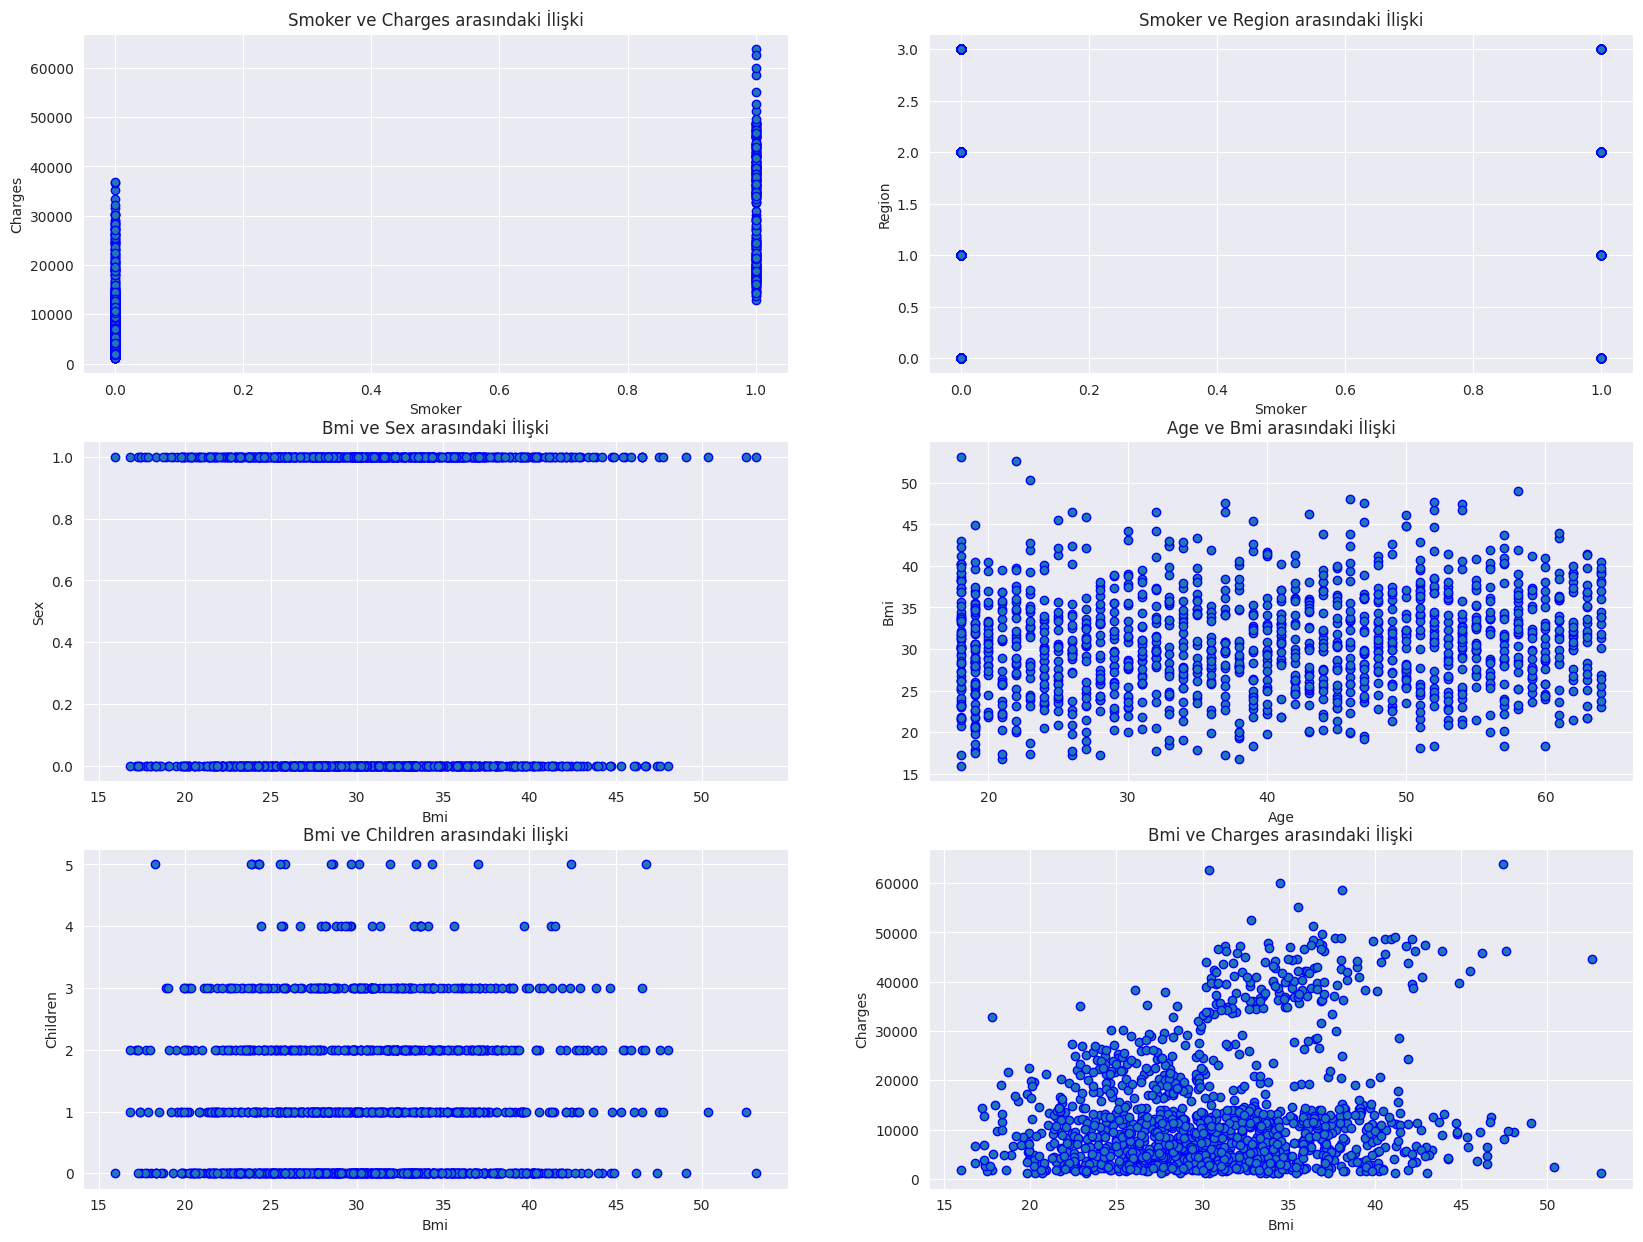

In [70]:
# Veriseti özelliklerimizin karşılaştırmalı scater dağılımı
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize=(20,15))

# Plot [0,0]
axes[0,0].scatter (x='smoker', y='charges', data = dte, edgecolor='b')
axes[0,0].set_xlabel('Smoker')
axes[0,0].set_ylabel('Charges')
axes[0,0].set_title('Smoker ve Charges arasındaki İlişki')

# Plot [0,1]
axes[0,1].scatter (x='smoker', y='region', data = dte, edgecolor='b')
axes[0,1].set_xlabel('Smoker')
axes[0,1].set_ylabel('Region')
axes[0,1].set_title('Smoker ve Region arasındaki İlişki')

# Plot [1,0]
axes[1,0].scatter (x='bmi', y='sex', data = dte, edgecolor='b')
axes[1,0].set_xlabel('Bmi')
axes[1,0].set_ylabel('Sex')
axes[1,0].set_title('Bmi ve Sex arasındaki İlişki')

# Plot [1,1]
axes[1,1].scatter (x='age', y='bmi', data = dte, edgecolor='b')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Bmi')
axes[1,1].set_title('Age ve Bmi arasındaki İlişki')

# Plot [2,0]
axes[2,0].scatter (x='bmi', y='children', data = dte, edgecolor='b')
axes[2,0].set_xlabel('Bmi')
axes[2,0].set_ylabel('Children')
axes[2,0].set_title('Bmi ve Children arasındaki İlişki')

# Plot [2,1]
axes[2,1].scatter (x='bmi', y='charges', data = dte, edgecolor='b')
axes[2,1].set_xlabel('Bmi')
axes[2,1].set_ylabel('Charges')
axes[2,1].set_title('Bmi ve Charges arasındaki İlişki')

plt.show()

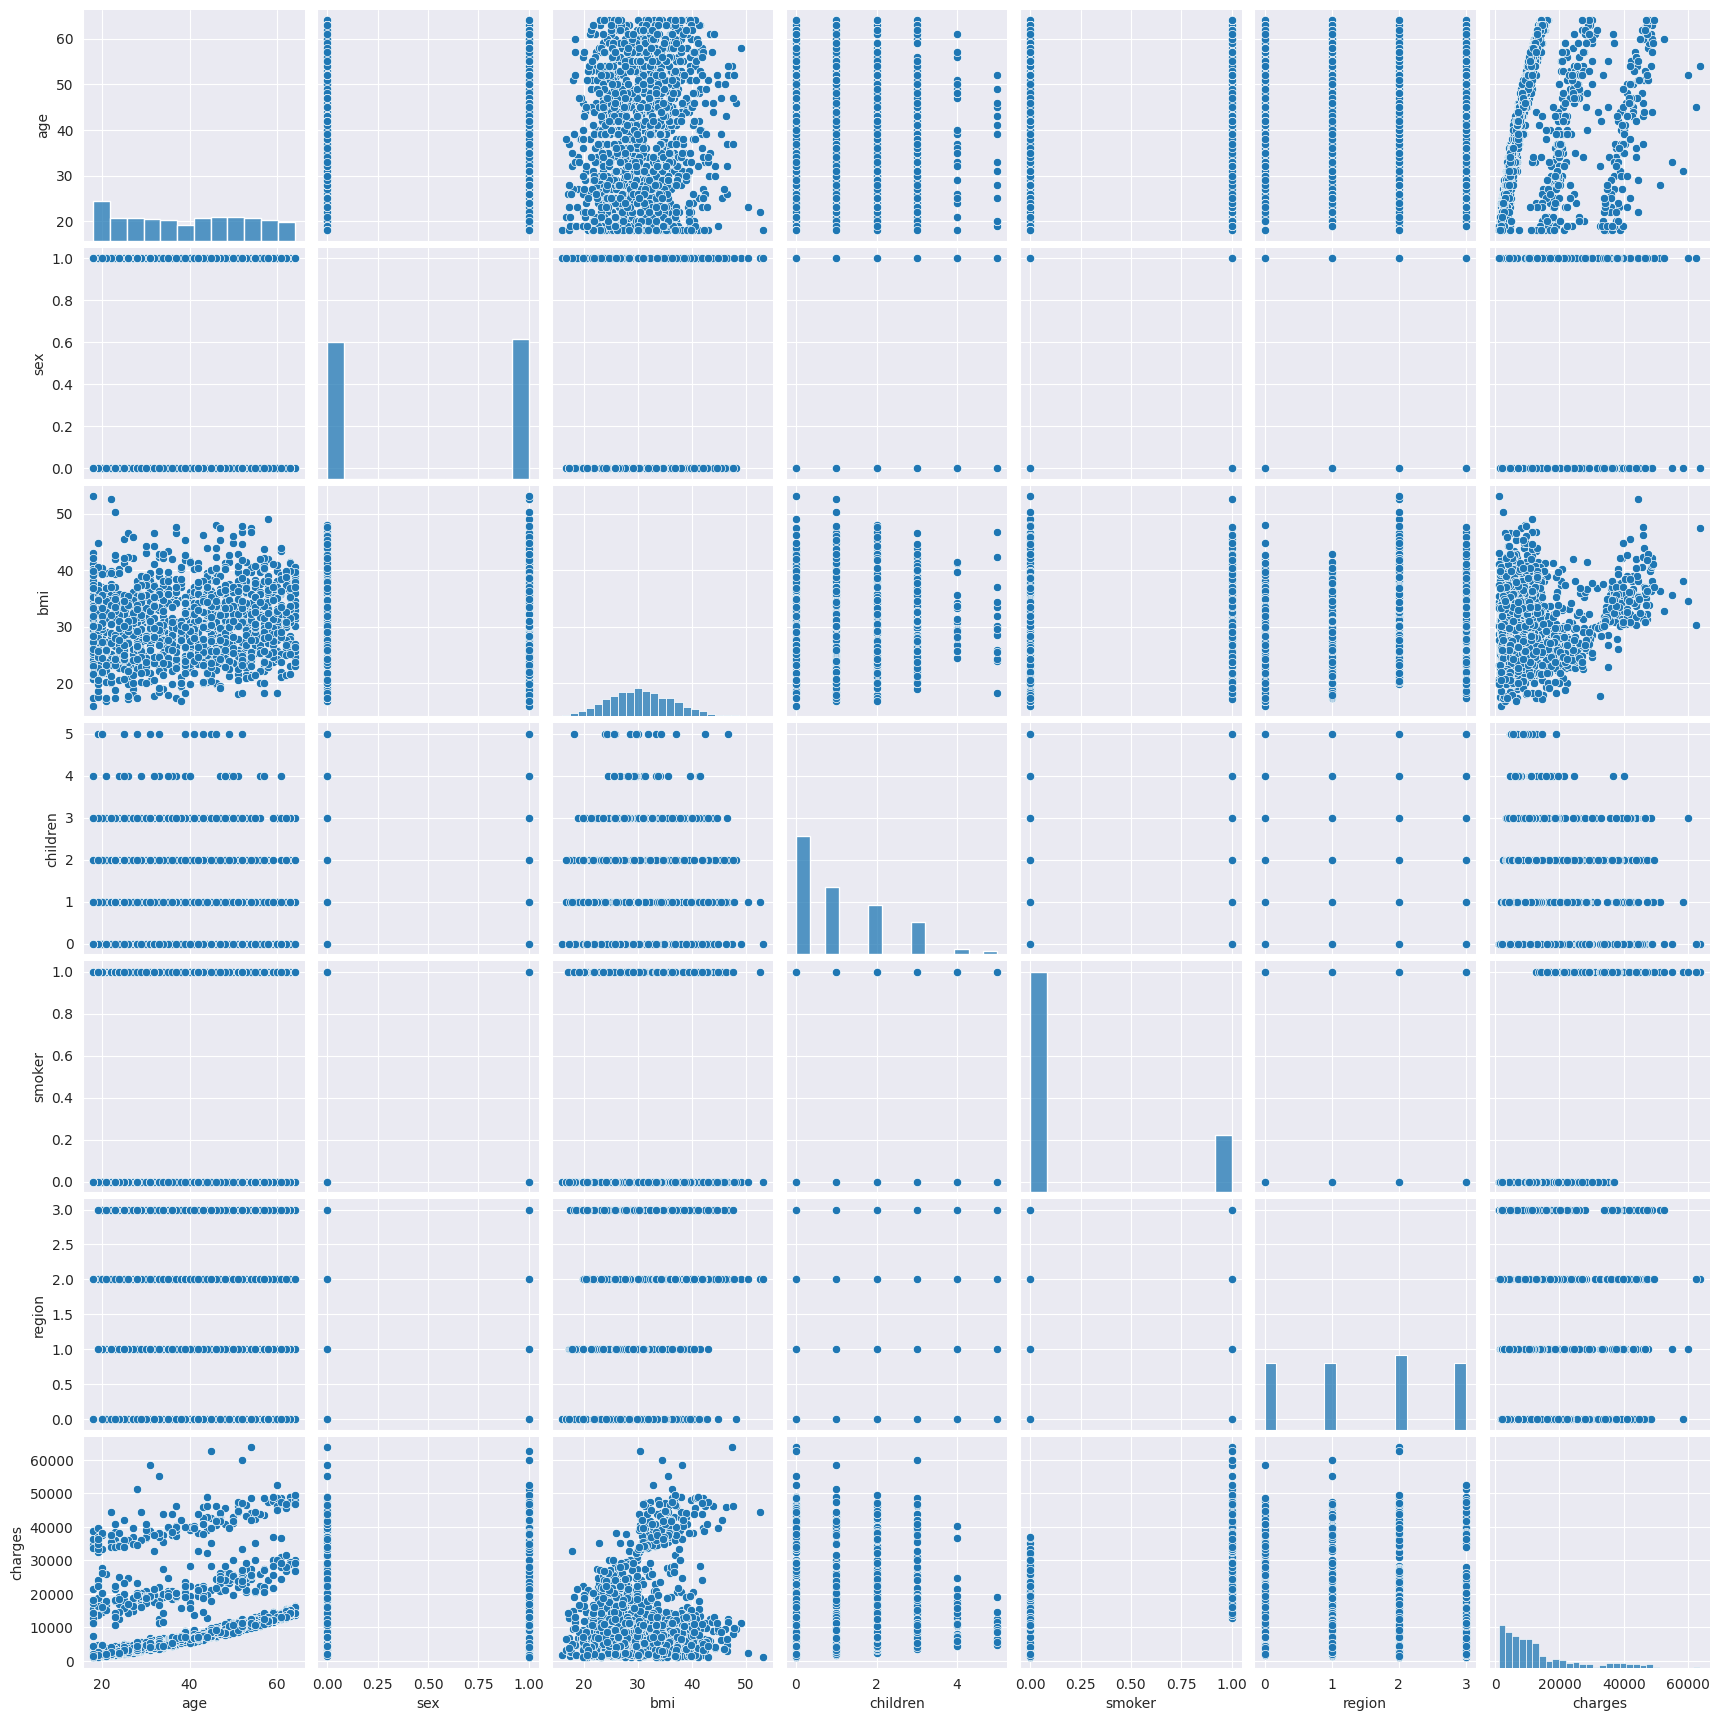

In [71]:
# Verisetimizin pairplot analizi
sns.pairplot(dte);

In [74]:
# En çok çocuk içeren bölgelerin listesi
dt.groupby(["region"])["children"].max()

region
northeast    5
northwest    5
southeast    5
southwest    5
Name: children, dtype: int64

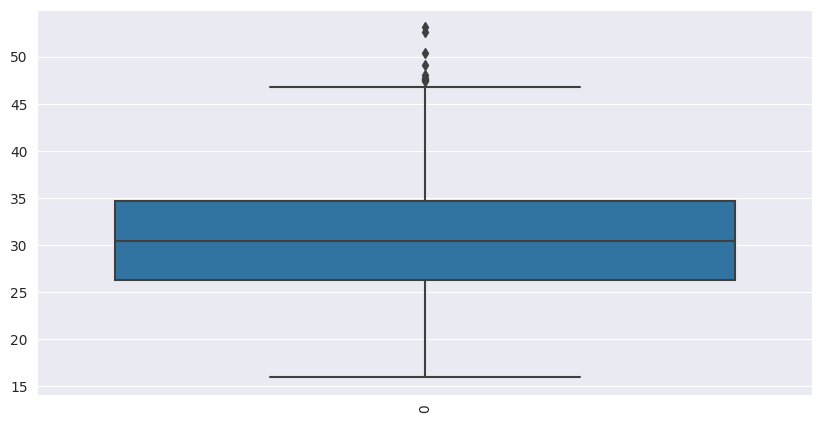

In [89]:
# BMI özelliğimizde Outlier(aykırı) değer incelemesi yapalım :
plt.figure(figsize=(10,5))
p = sns.boxplot(data=dte.bmi, orient ="v", width=0.8)
plt.xticks(rotation=90)
plt.show();

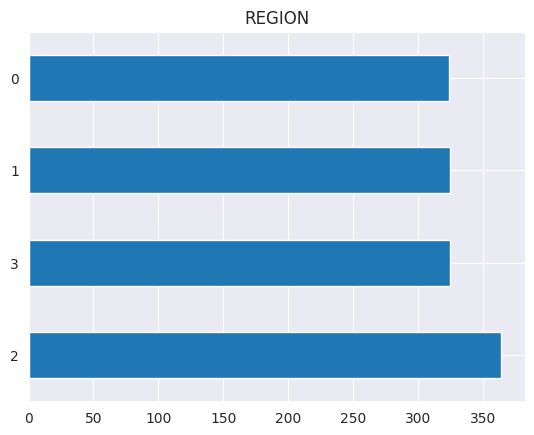

In [99]:
# Region özelliğini bar grafikte görelim
dte["region"].value_counts().plot.barh().set_title("REGION");

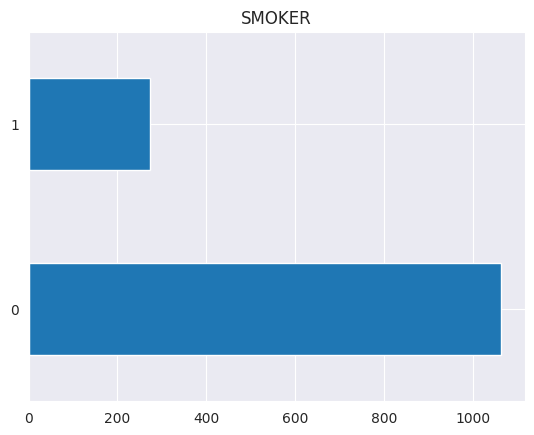

In [112]:
# Smoker özelliğini bar grafikte görelim
dte["smoker"].value_counts().plot.barh().set_title("SMOKER");

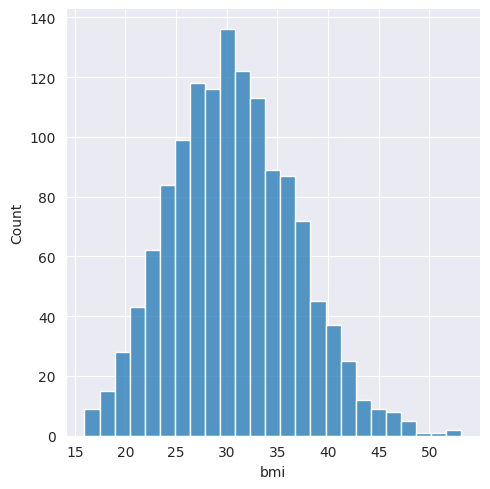

In [111]:
# BMI özelliğini bar grafikte görelim
sns.displot(dte['bmi']);

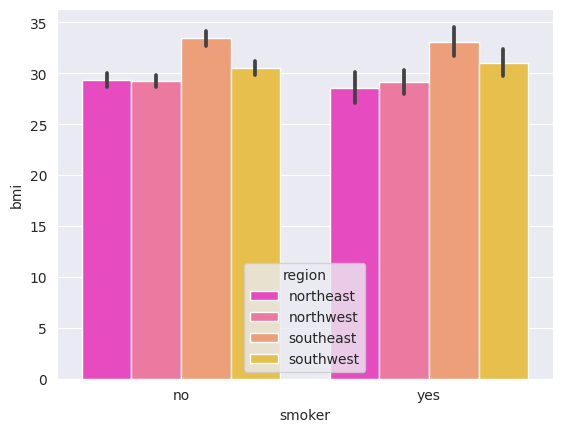

In [120]:
sns.barplot(data = dt, x = "smoker", y = "bmi", hue = 'region', palette = 'spring');

<Axes: >

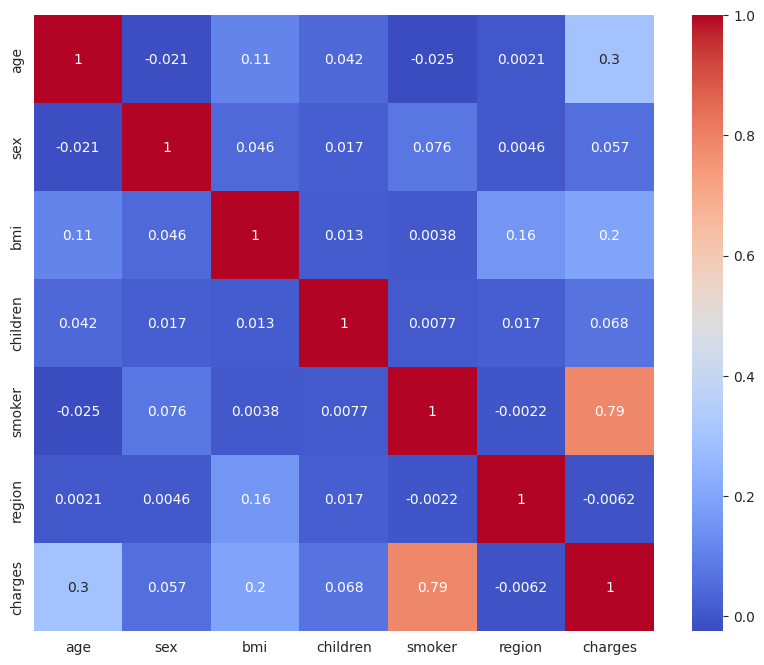

In [121]:
# Verisetimizdeki özellikler arasındaki korelasyonu inceleyelim:
plt.figure(figsize=(10,8))
sns.heatmap(dte.corr(),cmap='coolwarm',annot=True)

## ✅ Standardizasyon İşlemi

In [93]:
# Verisetimizi kopyalayalım
dts = dte.copy()
dts.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [95]:
dts_data = dts.drop(["charges"], axis=1)
dts_target = dts.charges
dts_data.shape, dts_target.shape

((1338, 6), (1338,))

In [96]:
scaler = StandardScaler()
dts_data.iloc[:,:] = scaler.fit_transform(dts_data.iloc[:,:])
dts_data.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


## ✅ Veriseti Bölme İşlemi

In [124]:
X_train,X_test,y_train,y_test = train_test_split(dts_data, dts_target, test_size = 0.2, random_state = 42)

In [125]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (1070, 6)
y_train :  (1070,)
X_test :  (268, 6)
y_test :  (268,)


## ✅ Modelleme

In [170]:
# Algoritma kütüphanelerini yükleyelim :
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [154]:
# Model nesnelerini oluşturalım :
models = {
          'Lasso': {
                'model': Lasso()
          },
          'LinearRegression': {
                'model': LinearRegression()
          },
          'Ridge': {
                'model': Ridge()
          },
          'ElasticNet': {
                'model': ElasticNet()
          },
          'KNeighborsRegressor': {
                'model': KNeighborsRegressor()
          },
          'RandomForestRegressor': {
                'model': RandomForestRegressor()
          },
          'GradientBoostingRegressor': {
                'model': GradientBoostingRegressor()
          },
          'AdaBoostRegressor': {
                'model': AdaBoostRegressor(n_estimators = 5, learning_rate =1.2, loss = 'exponential', random_state = 2)
          },
          'DecisionTreeRegressor': {
                'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
          }
        }

In [155]:
# Dictionary Attribute ekleyelim :
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
                              'mae': None,
                              'mse': None,
                              'rmse': None
                              }
    models[model]['scores'] = {
                              'r2': None
                              }

In [156]:
# Modelimizi çalıştıralım ve sonuçları görelim:
for model in models:
    print('Uygulanan Algoritma : ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test,models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Uygulanan Algoritma :  Lasso()
MAE:  0.7924786557687851
MSE:  1.0603828998373306
RMSE:  1.0297489499083408
R2:  -0.0009192486886582252


Uygulanan Algoritma :  LinearRegression()
MAE:  0.3458357023132989
MSE:  0.22952487683968595
RMSE:  0.4790875461120712
R2:  0.7833463107364536


Uygulanan Algoritma :  Ridge()
MAE:  0.34595503128026067
MSE:  0.229569722806535
RMSE:  0.4791343473458514
R2:  0.7833039796205405


Uygulanan Algoritma :  ElasticNet()
MAE:  0.6688045322131658
MSE:  0.7876396958561503
RMSE:  0.8874906736727718
R2:  0.2565291907907594


Uygulanan Algoritma :  KNeighborsRegressor()
MAE:  0.2514620274875975
MSE:  0.1758930442162328
RMSE:  0.4193960469725875
R2:  0.8339706027950087


Uygulanan Algoritma :  RandomForestRegressor()
MAE:  0.20552464553297786
MSE:  0.14378273037360334
RMSE:  0.3791869332843675
R2:  0.8642802496324409


Uygulanan Algoritma :  GradientBoostingRegressor()
MAE:  0.20225074358723508
MSE:  0.1296392828391398
RMSE:  0.36005455536507214
R2:  0.8776305675998

## ✅ Hyperparameter

In [165]:
param_dist = {
    'n_estimators': np.arange(100,2000,100),
    'max_depth' : np.arange(2, 12 , 1),
    'learning_rate': np.arange(0.01 , 1 , 0.05),
    'subsample': [0.5 , 0.6 , 0.7, 0.8 , 0.9 , 1]
}

In [166]:
tune_model = GradientBoostingRegressor()

In [167]:
random_model = RandomizedSearchCV(tune_model , param_dist , n_iter = 30 , cv = 5 , scoring = 'neg_mean_squared_error')

random_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=30,
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_mean_squared_error')

In [168]:
random_model.best_params_

{'subsample': 0.7, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.01}

In [169]:
tuned_xgb = random_model.best_estimator_

In [172]:
y_pred = tuned_xgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test , y_pred)
mse = metrics.mean_squared_error(y_test , y_pred)
rmse = metrics.mean_squared_error(y_test , y_pred) ** 0.5
r2 = metrics.r2_score(y_test , y_pred)

print(f"""
  MAE : {mae}
  MSE : {mse}
  RMSE : {rmse}
  R2 : {r2}
  """)


  MAE : 0.20481181198895812
  MSE : 0.14075609228568176
  RMSE : 0.3751747489979593
  R2 : 0.8671371613399756
  
